# Investigating the Best Market/Strategy to Advertise in

In this project, we are analyzing the best market to invest in for our e-learning client company that specialize in online courses in web and mobile development among others. THe company would like to promote their product and invest some money in finding the Best Markets to Advertise In advertisement. Our goal in this project is to find out the two best markets to advertise our product in.

Some questions we would like to answer throughout the analysis:
-	What is the best market to invest in advertisement of products (courses)?
-	Best value? Most cost-effective? Best in terms of success-rate?

-	Allows the company to strategically invest their resources in a advertisement that yields successful customer attraction and retention.
-	Allows to get more # of customers and get valuable customers.


## Finding Potential Data that Could Serve Our Goal
One possible way to collect relevant data is to organize our own survey. However, this process could be expensive and time consuming and because the clients need the analysis soon for their launch, we explored other options.

One interesting dataset we came across was a survey posted by a similar e-learning company: FreeCodeCamp. With medium publications having 40.000 followers, their surveys managed to attract quite a lot (20,282 responses) of new coders (< 5 yrs). Glimpse into how people are learning to code.The entire dataset of participants’ individual responses to all 48/16? questions. Goal was to understand these people's motivations in learning to code, how they're learning to code, their demographics, and their socioeconomic background. Read more on their [website](https://www.freecodecamp.org/news/we-asked-15-000-people-who-they-are-and-how-theyre-learning-to-code-4104e29b2781#.5mxwnyk80).

These dataset can be downloaded at the [public GitHub](https://github.com/freeCodeCamp/2017-new-coder-survey/tree/master?tab=readme-ov-file). 

For this project, we'll be working with the raw data by merging the following datasets together and prepping the data for analysis:
1. **2017-new-coder-survey-part-1.csv** - the first half of the survey. 100% of respondants completed this section.
2. **2017-new-coder-survey-part-2.csv** - the first half of the survey, plus the second half - which about 95% of respondants also completed.

We'll look at the 2nd dataset with both part one and part 2 of survey data (completely by heaping 95%).

In [1]:
# Config option to print all interactive output in a cell
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

### Revisiting the Goal with Specificity

For the purpose of our analysis, we want to answer questions 
about a population of new coders that are interested in the subjects we teach. 
We'd like to ideally identify the potential customers based on ()in order to maximize the conversion rate and determine the best staregies to advertise in:
* Where are these new coders located.
* How much money new coders are willing to spend on learning.
* Potential interest in the products the client sells.

Based on the documentation, the survey consists of 100+ columns and xxx+ entries. Rather than loading all the dataset, we'll only load the columns most relevant to our research in terms of answering our research question and providing value.

The columns we're most interested are the ones that answer:
- Coder's location
- Coder's spending capacity
- Coder's willingness to spend on learning
- Topics and Areas of interest and wehtehr it aligns witht he product the client offers
- Learning Habits

Based on the documentation, we've identified such columns and will be loading the same from each dataset.

In [2]:
import pandas as pd

columns_to_import = [
    '#',
    'How old are you?',
    "What's your gender?",
    'Which country are you a citizen of?',
    'Which country do you currently live in?',
    'About how many people live in your city?',
    'Which language do you you speak at home with your family?',
    'About how much money did you make last year (in US dollars)?',
    'jobs_interested_in',
    'expected_earnings',
    'months_learning',
    'total_spent_learning'
]

# Read in all relevant columns from the first dataset
survey_data = pd.read_csv('./datasets/2017-new-coder-survey-part-2.csv', dtype='object')[columns_to_import]

survey_data.head(3)
survey_data.tail(3)


,#,How old are you?,What's your gender?,Which country are you a citizen of?,Which country do you currently live in?,About how many people live in your city?,Which language do you you speak at home with your family?,About how much money did you make last year (in US dollars)?,jobs_interested_in,expected_earnings,months_learning,total_spent_learning
0,21db37adb60cdcafadfa7dca1b13b6b1,34,male,United States of America,United States of America,"less than 100,000",English,NaN,Full-Stack Web Developer,35000,6,80
1,e0b92236ac53b58f079231e014748dc3,26,male,Brazil,Brazil,more than 1 million,Portuguese,15000,NaN,NaN,48,0
2,21ba173828fbe9e27ccebaf4d5166a55,21,male,United States of America,United States of America,more than 1 million,Spanish,13000,"Front-End Web Developer, Back-End Web Develo...",70000,5,1000


,#,How old are you?,What's your gender?,Which country are you a citizen of?,Which country do you currently live in?,About how many people live in your city?,Which language do you you speak at home with your family?,About how much money did you make last year (in US dollars)?,jobs_interested_in,expected_earnings,months_learning,total_spent_learning
18884,c0d0b88bc2b76087232bfa0327457b04,24,female,India,India,"between 100,000 and 1 million",Malayalam,NaN,NaN,NaN,23,0
18885,52c24e8c43bb044e1b3e1df39a5c4b9b,21,male,Italy,Italy,"between 100,000 and 1 million",Italian,NaN,"User Experience Designer, Data Scientist, ...",20000,18,0
18886,7b6a092fef05254d9d6c7ba565e8d3f0,NaN,male,Ghana,Ghana,"less than 100,000",English,NaN,NaN,NaN,24,0


### Initial Observations:

- 18886 entries (95% of total respondents who answered both parts).
- Standardize column names to easily understandable names.
- Initially all types were object in import, generally true. Correct some.
- Empty rows? Empty column data? What to do? (Later removing the null jobinterestedin)
- Population size - categorical - rather be interval for analysis?

We'll keep this in mind and analyze further in the cleaning stage.

## Checking Sample Representativity of Population

Before starting to analyze the sample data we have, we need to clarify whether it's representative for our population of interest and it has the right categories of people for our purpose.

The `jobs_interested_in` should be a good indicator of the surveyer's interest and whether enough people share interest that align with our product to be a representative of our population of interest (potential customers).

Let's begin by understanding the frequency distribution of the jobs people are interested in.

In [3]:
# Generate the frequency distribution table for surveyer's jobs of interest
survey_data['jobs_interested_in'].value_counts(normalize=True, dropna=False) * 100

jobs_interested_in
NaN                                                                                                                                                                                                                                           54.513687
Full-Stack Web Developer                                                                                                                                                                                                                       5.199343
  Front-End Web Developer                                                                                                                                                                                                                      2.885583
  Data Scientist                                                                                                                                                                                                                             

Quite granular and difficult to assess the information. Few notes:
- Looks like Full-Stack Web Develope is the top most frequent stand-alone choice (5%).
- However, a lot are NaN, indicating that over half (55%) of surveyers did'nt have a clear choice.

We'll remove the na temperoraily to avoid skewing our analysis.

In [4]:
# Drop nulls
interest_non_null = survey_data.copy().loc[survey_data['jobs_interested_in'].notnull(), 'jobs_interested_in']

interest_non_null.value_counts(normalize=True, dropna=False) * 100

interest_non_null.count()


jobs_interested_in
Full-Stack Web Developer                                                                                                                                                                                                                      11.430567
  Front-End Web Developer                                                                                                                                                                                                                      6.343848
  Data Scientist                                                                                                                                                                                                                               2.293097
Back-End Web Developer                                                                                                                                                                                                                       

8591

In [5]:
# Count number of people interested in 1 or more courese distribution

split_interests_col = interest_non_null.str.split(',')
split_interests_col.str.len().value_counts(normalize=True) * 100

jobs_interested_in
1     31.730881
3     15.562798
4     15.306716
5     11.849610
2     10.732162
6      6.844372
7      3.957630
8      1.885694
9      1.070888
10     0.465604
12     0.349203
11     0.209522
13     0.034920
Name: proportion, dtype: float64

In [6]:
# Create boolean for main courses offered
courses_bool = interest_non_null.str.lower().str.contains('web developer|mobile developer|data scientist')

interest_non_null[courses_bool].count()

courses_bool.value_counts(normalize=True) * 100


7800

jobs_interested_in
True     90.79269
False     9.20731
Name: proportion, dtype: float64

<Axes: xlabel='jobs_interested_in'>

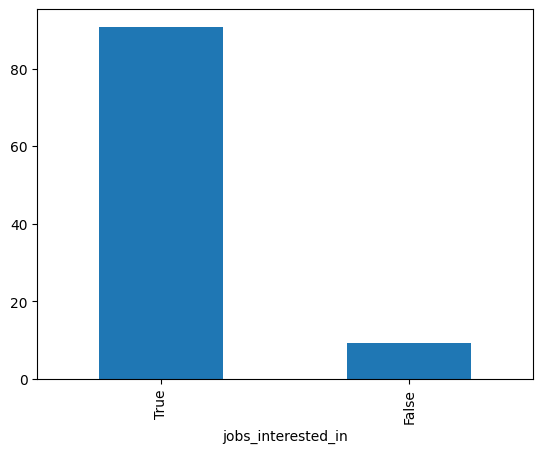

In [7]:
import matplotlib.pyplot as plt

(courses_bool.value_counts(normalize=True)*100).plot.bar()

31.7% had a clear idea of one programming course. The rest 100-32 had multiple courses. For an e-learning company offereing multiple topics of interest, this might translate to they're being the potential customers interestd in more than one product and therefore more opportunities to convert them to a loyal customer who will likely pay the monthly subs fee to continue learning multiple courses offered.

Out of all 8,591 non-null entries, 7,800 people are interested in either roles related to web development or mobile development, making up roughly 91% of survey takers who had specified their interests.

Data seems representative (91%) survey's interested in one of the most popular courses offered by the company.

## Clean and Prep Data for Further Analysis

Now that we know our dataset is representative of population adn goal of interest. 

- 18886 entries (95% of total respondents who answered both parts).
- Standardize column names to easily understandable names.
- Initially all types were object in import, generally true. Correct some.
- Empty rows? Empty column data? What to do? (Later removing the null jobinterestedin)
- Population size - categorical - rather be interval for analysis?

**1. Simplify Column Names**


In [8]:
# View all column names
survey_data.columns

Index(['#', 'How old are you?', 'What's your gender?',
       'Which country are you a citizen of?',
       'Which country do you currently live in?',
       'About how many people live in your city?',
       'Which language do you you speak at home with your family?',
       'About how much money did you make last year (in US dollars)?',
       'jobs_interested_in', 'expected_earnings', 'months_learning',
       'total_spent_learning'],
      dtype='object')

In [9]:
# Create a dictionary to update the column names
simplified_names = ['Id', 'Age', 'Gender', 'CountryCitizen', 'CountryLive', 'CityPopulation', 'Language', 'IncomePrevYear', 'JobRoleInterest', 'ExpectedIncome', 'MonthsProgramming', 'MoneyForLearning', ]

column_mapping = {}

# For Loop to create a column names mapping
for i, j in zip(survey_data.columns, simplified_names):
    column_mapping[i] = j

survey_data.rename(columns=column_mapping, inplace=True)

survey_data.columns

Index(['Id', 'Age', 'Gender', 'CountryCitizen', 'CountryLive',
       'CityPopulation', 'Language', 'IncomePrevYear', 'JobRoleInterest',
       'ExpectedIncome', 'MonthsProgramming', 'MoneyForLearning'],
      dtype='object')

**2. Correct data types**

Initially, all data types were inported as objects. We might want to change some of them so it better represents the data and provided for an accurate calculation during analysis.

In [10]:
# 
cols_to_update = ['Age', 'MonthsProgramming', 'MoneyForLearning']

survey_data[cols_to_update].dtypes

Age                  object
MonthsProgramming    object
MoneyForLearning     object
dtype: object

- It makes sense to remove convert age, population, income related columns, money for learning, months programming to int as we plan on performing calculations with some of these columns later.

In [17]:
# # Function to clean up  a list of bad characters

# def cleanColumn(cols,bad_chars):
#     for col in cols:
#         for char in bad_chars:
#             col = col.replace(char, '')

# survey_data[col] = survey_data[col].str.split('-')[1]


In [15]:
# Bad char
bad_char = ['xxxxx']

# Change datatypes
#cleanColumn(survey_data[cols_to_update], bad_char)

# survey_data['Age'].apply(sum)

# for col in cols_to_update:
#     survey_data[col] = survey_data[col].replace('xxxxx', '0')
#     survey_data[col] = survey_data[col].replace('', '0')
#     survey_data[col] = survey_data[col].str.replace(',', '')
#     survey_data[col] = survey_data[col].str.replace('over $', '')
#     survey_data[col] = survey_data[col].str.replace(' monthly', '')

survey_data['Age'].astype(float)
survey_data['MonthsProgramming'] = survey_data['MonthsProgramming'].str.replace(' months', '')
survey_data['MonthsProgramming'] = survey_data['MonthsProgramming'].str.replace(' mont', '')
survey_data['MonthsProgramming'] = survey_data['MonthsProgramming'].str.replace('xxxxx', '0')
survey_data['MonthsProgramming'] = survey_data['MonthsProgramming'].astype(str)

# Drop rows where 'MonthsProgramming' column contains 'code camp'
survey_data = survey_data[~survey_data['MonthsProgramming'].str.contains('code camp')]

# survey_data[cols_to_update].astype(float)

0        34.0
1        26.0
2        21.0
3        26.0
4        20.0
         ... 
18882    46.0
18883    25.0
18884    24.0
18885    21.0
18886     NaN
Name: Age, Length: 18886, dtype: float64

In [16]:
survey_data['MonthsProgramming'].astype(float)

0          6.0
1         48.0
2          5.0
3          5.0
4         24.0
         ...  
18882    100.0
18883      9.0
18884     23.0
18885     18.0
18886     24.0
Name: MonthsProgramming, Length: 18886, dtype: float64

**3. Remove null values**

Since one of our criteria is to find if those participants interested in the courses offered, we'll drop all the rows where participants didn't answer what role they are interested in. Where a participant didn't respond, we can't know for sure what their interests are, so it's better if we leave out this category of participants.

In [23]:
# Drop rows where JobsInterestedIn is null

survey_data['JobRoleInterest'].value_counts(dropna=False, normalize=True) * 100


JobRoleInterest
NaN                                                                                                                                                                                                                                           54.516573
Full-Stack Web Developer                                                                                                                                                                                                                       5.199619
  Front-End Web Developer                                                                                                                                                                                                                      2.885735
  Data Scientist                                                                                                                                                                                                                               1

In [29]:
# Drop rows where JobsInterestedIn is null
survey_data = survey_data[survey_data['JobRoleInterest'].notnull()]

survey_data['JobRoleInterest'].value_counts(dropna=False, normalize=True) * 100

JobRoleInterest
Full-Stack Web Developer                                                                                                                                                                                                                      11.431898
  Front-End Web Developer                                                                                                                                                                                                                      6.344587
  Data Scientist                                                                                                                                                                                                                               2.293364
Back-End Web Developer                                                                                                                                                                                                                         2

## Analysis

We'd like to know:
 Where are these new coders located.
 What are the locations with the greatest number of new coders.
 How much money new coders are willing to spend on learning.